In [93]:
import pandas as pd

In [94]:
page1 = pd.read_csv("Page1.csv")
page1

,Affected Legal Good,Month,Value,City
0,Patrimonio,2015-01,189,Apodaca
1,Patrimonio,2015-02,238,Apodaca
2,Patrimonio,2015-03,203,Apodaca
3,Patrimonio,2015-04,196,Apodaca
4,Patrimonio,2015-05,212,Apodaca
...,...,...,...,...
6043,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-08,55,Santiago
6044,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-09,34,Santiago
6045,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-10,17,Santiago
6046,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-11,15,Santiago


In [95]:
import pandas as pd

# Assuming your dataframe is named 'df'
page1['Month'] = pd.to_datetime(page1['Month'], format='%Y-%m')
page1['Period'] = page1['Month'].dt.to_period('Q')  # Create a new column representing the 3-month period

grouped_df = page1.groupby(['Affected Legal Good', 'City', 'Period']).agg({'Value': 'sum'}).reset_index()
grouped_df


,Affected Legal Good,City,Period,Value
0,Familia,Apodaca,2015Q1,504
1,Familia,Apodaca,2015Q2,671
2,Familia,Apodaca,2015Q3,723
3,Familia,Apodaca,2015Q4,505
4,Familia,Apodaca,2016Q1,508
...,...,...,...,...
2011,Vida e Integridad Corporal,Santiago,2021Q4,26
2012,Vida e Integridad Corporal,Santiago,2022Q1,23
2013,Vida e Integridad Corporal,Santiago,2022Q2,36
2014,Vida e Integridad Corporal,Santiago,2022Q3,36


In [96]:
from pyod.models.knn import KNN

grouped_df=grouped_df.set_index("Period")

In [97]:
df_apodaca = grouped_df[grouped_df["City"] == "Apodaca"]
df_apodaca = df_apodaca.drop(["City"], axis=1)
df_escobedo = grouped_df[grouped_df["City"] == "Escobedo"]
df_escobedo = df_escobedo.drop(["City"], axis=1)
df_garcia = grouped_df[grouped_df["City"] == "García"]
df_garcia = df_garcia.drop(["City"], axis=1)
df_guadalupe = grouped_df[grouped_df["City"] == "Guadalupe"]
df_guadalupe = df_guadalupe.drop(["City"], axis=1)
df_juarez = grouped_df[grouped_df["City"] == "Juarez"]
df_juarez = df_juarez.drop(["City"], axis=1)
df_monterrey = grouped_df[grouped_df["City"] == "Monterrey"]
df_monterrey = df_monterrey.drop(["City"], axis=1)
df_san_nico = grouped_df[grouped_df["City"] == "San Nicolás de los Garza"]
df_san_nico = df_san_nico.drop(["City"], axis=1)
df_santa = grouped_df[grouped_df["City"] == "Santa Catarina"]
df_santa = df_santa.drop(["City"], axis=1)
df_santiago = grouped_df[grouped_df["City"] == "Santiago"]
df_santiago = df_santiago.drop(["City"], axis=1)


Apodaca

In [98]:
df_encoded = pd.get_dummies(df_apodaca, columns=["Affected Legal Good"])

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(["Affected Legal Good_Familia", "Affected Legal Good_Libertad Personal", "Affected Legal Good_Libertad y Seguridad Sexual", "Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común)", "Affected Legal Good_Patrimonio", "Affected Legal Good_Sociedad", "Affected Legal Good_Vida e Integridad Corporal"], axis=1)
y = df_encoded[["Affected Legal Good_Familia", "Affected Legal Good_Libertad Personal", "Affected Legal Good_Libertad y Seguridad Sexual", "Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común)", "Affected Legal Good_Patrimonio", "Affected Legal Good_Sociedad", "Affected Legal Good_Vida e Integridad Corporal"]]

# Initialize the KNN model
knn = KNN()

# Fit the model
knn.fit(X, y)

# Make predictions
predictions = knn.predict(X)

c:\Users\jp_gl\.julia\conda\3\lib\site-packages\pyod\models\base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [99]:
df_encoded

,Value,Affected Legal Good_Familia,Affected Legal Good_Libertad Personal,Affected Legal Good_Libertad y Seguridad Sexual,Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común),Affected Legal Good_Patrimonio,Affected Legal Good_Sociedad,Affected Legal Good_Vida e Integridad Corporal
Period,,,,,,,,
2015Q1,504,1,0,0,0,0,0,0
2015Q2,671,1,0,0,0,0,0,0
2015Q3,723,1,0,0,0,0,0,0
2015Q4,505,1,0,0,0,0,0,0
2016Q1,508,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2021Q4,232,0,0,0,0,0,0,1
2022Q1,187,0,0,0,0,0,0,1
2022Q2,184,0,0,0,0,0,0,1


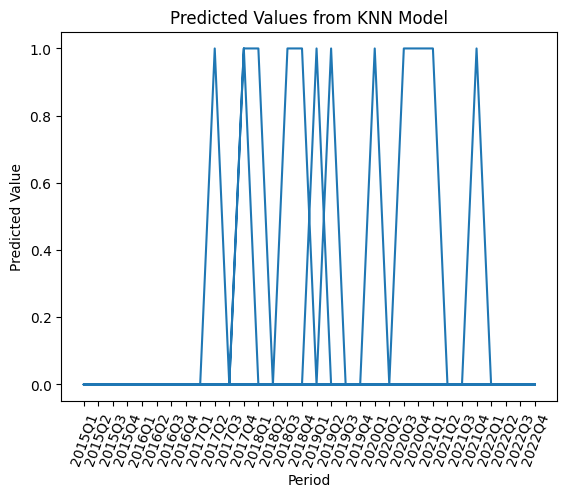

In [103]:
import matplotlib.pyplot as plt

# Convert index values to strings
df_apodaca.index = df_apodaca.index.astype(str)

# Plotting using the updated index
plt.plot(df_apodaca.index, predictions)
plt.xlabel('Period')
plt.ylabel('Predicted Value')
plt.title('Predicted Values from KNN Model')
plt.xticks(rotation=70)
plt.show()